# Problem Statement
#### An airline food vendor wants to analyze the airline customer preference regarding the meals during the holidays season. They are currently facing issues of unable to meet the food demands of the customers during the holiday season. So, they want to build a model which predicts the customer food requirement based on various factors. This helps them to order the raw materials beforehand and provide a continuous supply of meals to the airline.

In [294]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [295]:
df=sns.load_dataset("Passanger_booking_data")
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49997,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49998,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49999,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
50000,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


## EDA

<AxesSubplot:xlabel='wants_in_flight_meals', ylabel='count'>

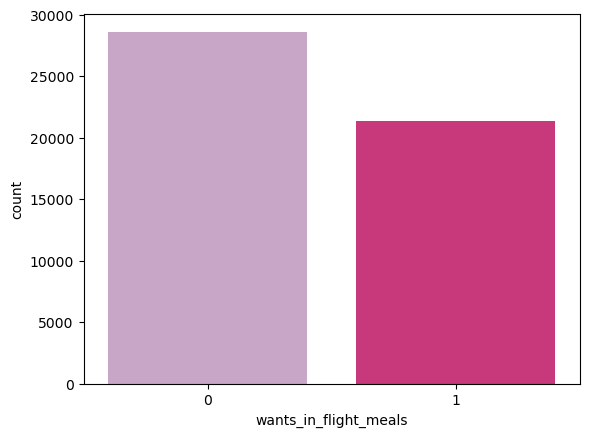

In [296]:
sns.countplot(data=df,x=df['wants_in_flight_meals'],palette='PuRd')

<AxesSubplot:title={'center':'Passengers who wants meals inflight'}, xlabel='wants_in_flight_meals', ylabel='count'>

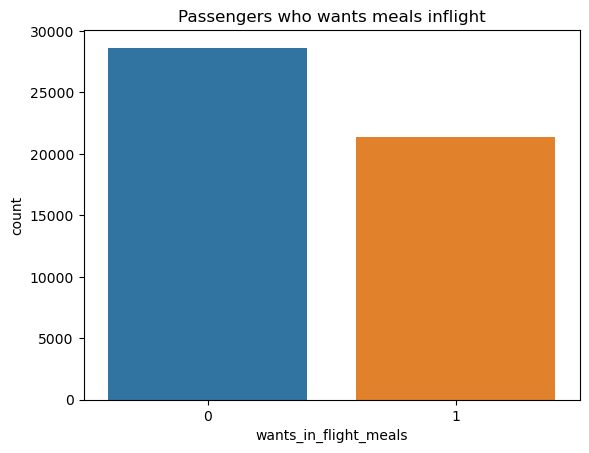

In [297]:
plt.title('Passengers who wants meals inflight')
plt.xlabel('No of passengers')
sns.countplot(data=df,x='wants_in_flight_meals')

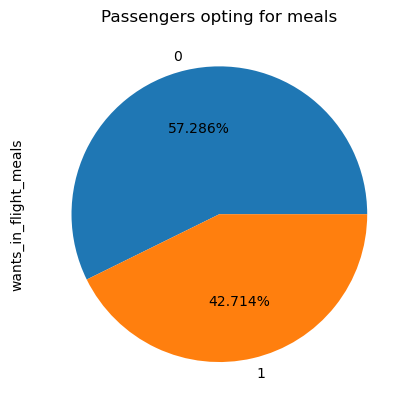

In [298]:
#booking_complete
plt.title('Passengers opting for meals')
df['wants_in_flight_meals'].value_counts().plot(kind='pie',autopct='%.3f%%')
plt.show()

In [299]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

# Feature Engineering

In [300]:
df['Startroute']=df['route'].str[:3]
df['Startroute']

## First three letters denote starting location we are flitering using the starting destination.

0        AKL
1        AKL
2        AKL
3        AKL
4        AKL
        ... 
49997    PER
49998    PER
49999    PER
50000    PER
50001    PER
Name: Startroute, Length: 50002, dtype: object

In [301]:
df['Endroute']=df['route'].str[3:]
df['Endroute']

## First three letters denote starting location we are flitering using the Ending destination.

0        HGH
1        DEL
2        DEL
3        DEL
4        DEL
        ... 
49997    PNH
49998    PNH
49999    PNH
50000    PNH
50001    PNH
Name: Endroute, Length: 50002, dtype: object

In [302]:
#Provides numeric representaion of values
df['Startroute']=pd.factorize(df['Startroute'],sort=True)[0]
df['Startroute']

0         0
1         0
2         0
3         0
4         0
         ..
49997    66
49998    66
49999    66
50000    66
50001    66
Name: Startroute, Length: 50002, dtype: int64

In [303]:
#Provides numeric representaion of values
df['Endroute']=pd.factorize(df['Endroute'],sort=True)[0]
df['Endroute']

0         7
1         4
2         4
3         4
4         4
         ..
49997    40
49998    40
49999    40
50000    40
50001    40
Name: Endroute, Length: 50002, dtype: int64

In [304]:
df['flight_day']=df['flight_day'].replace({'Mon':'WD','Tue':'WD','Wed':'WD','Thu':'WD','Fri':'WD','Sat':'WK','Sun':'WK'})
df['flight_day']=pd.factorize(df['flight_day'],sort=True)[0]
df['flight_day']
# Converting days into weekday and weekend

0        0
1        1
2        1
3        0
4        1
        ..
49997    1
49998    1
49999    1
50000    0
50001    0
Name: flight_day, Length: 50002, dtype: int64

In [305]:
df['booking_origin']=pd.factorize(df['booking_origin'],sort=True)[0]
df['booking_origin']

0         4
1        61
2        61
3        36
4        61
         ..
49997     4
49998     4
49999     4
50000     4
50001     4
Name: booking_origin, Length: 50002, dtype: int64

In [306]:
df['sales_channel']=pd.factorize(df['sales_channel'],sort=True)[0]
df['sales_channel']

0        0
1        0
2        0
3        0
4        0
        ..
49997    0
49998    0
49999    0
50000    0
50001    0
Name: sales_channel, Length: 50002, dtype: int64

In [307]:
df['trip_type']=pd.factorize(df['trip_type'],sort=True)[0]
df['trip_type']

0        2
1        2
2        2
3        2
4        2
        ..
49997    2
49998    2
49999    2
50000    2
50001    2
Name: trip_type, Length: 50002, dtype: int64

In [308]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Startroute,Endroute
0,1,0,2,21,12,6,0,AKLHGH,4,0,0,0,7.21,1,0,7
1,2,0,2,262,19,7,1,AKLDEL,61,1,0,0,5.52,0,0,4
2,1,0,2,112,20,3,1,AKLDEL,61,0,0,0,5.52,0,0,4
3,2,0,2,243,22,17,0,AKLDEL,36,1,1,0,5.52,0,0,4
4,1,0,2,96,31,4,1,AKLDEL,61,0,0,1,5.52,0,0,4


In [309]:
df.describe()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Startroute,Endroute
count,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000
mean,1.591256,0.112376,1.987580,84.940582,23.044778,9.066277,0.247310,38.262190,0.668773,0.296968,0.427143,7.277524,0.149574,35.089056,36.580317
std,1.020167,0.315831,0.130175,90.450548,33.887171,5.412569,0.431453,32.756408,0.470659,0.456927,0.494668,1.496854,0.356657,20.317013,14.466776
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,2.000000,21.000000,5.000000,5.000000,0.000000,4.000000,0.000000,0.000000,0.000000,5.620000,0.000000,20.000000,28.000000
50%,1.000000,0.000000,2.000000,51.000000,17.000000,9.000000,0.000000,37.000000,1.000000,0.000000,0.000000,7.570000,0.000000,33.000000,39.000000
75%,2.000000,0.000000,2.000000,115.000000,28.000000,13.000000,0.000000,57.000000,1.000000,1.000000,1.000000,8.830000,0.000000,55.000000,50.000000
max,9.000000,1.000000,2.000000,867.000000,778.000000,23.000000,1.000000,103.000000,1.000000,1.000000,1.000000,9.500000,1.000000,84.000000,63.000000


In [310]:
## Checking the independence of the variables using Chi square test

from scipy.stats import chi2_contingency
for i in df.columns:
    if i =='booking_complete':
        continue
    else:
        tab = pd.crosstab(df[i],df['booking_complete'])
        result = chi2_contingency(tab)
        if result[1]<0.05:
            print('significant')


significant
significant
significant
significant
significant
significant
significant
significant
significant
significant
significant
significant
significant
significant


In [311]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['purchase_lead']])
scaled_data1 = scaler.fit_transform(df[['length_of_stay']])
scaled_data2 = scaler.fit_transform(df[['flight_hour']])
scaled_data3 = scaler.fit_transform(df[['booking_origin']])
df['purchase_lead']=scaled_data
df['length_of_stay']=scaled_data1
df['flight_hour']=scaled_data2
df['booking_origin']=scaled_data3

In [312]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Startroute,Endroute
0,1,0,2,0.024221,0.015424,0.260870,0,AKLHGH,0.038835,0,0,0,7.21,1,0,7
1,2,0,2,0.302191,0.024422,0.304348,1,AKLDEL,0.592233,1,0,0,5.52,0,0,4
2,1,0,2,0.129181,0.025707,0.130435,1,AKLDEL,0.592233,0,0,0,5.52,0,0,4
3,2,0,2,0.280277,0.028278,0.739130,0,AKLDEL,0.349515,1,1,0,5.52,0,0,4
4,1,0,2,0.110727,0.039846,0.173913,1,AKLDEL,0.592233,0,0,1,5.52,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49997,2,0,2,0.031142,0.007712,0.391304,1,PERPNH,0.038835,1,0,1,5.62,0,66,40
49998,1,0,2,0.128028,0.007712,0.173913,1,PERPNH,0.038835,0,0,0,5.62,0,66,40
49999,1,0,2,0.027682,0.007712,0.956522,1,PERPNH,0.038835,0,0,1,5.62,0,66,40
50000,1,0,2,0.017301,0.007712,0.478261,0,PERPNH,0.038835,1,0,1,5.62,0,66,40


## Model building

In [313]:
x=df.drop(["wants_in_flight_meals","route","booking_complete"],axis=1)
y=df["wants_in_flight_meals"]
## We are dropping the booking complete column as we are instered only on customer preference

In [314]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [315]:
model = LogisticRegression(max_iter=10000)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.33, random_state=6)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((33501, 13), (16501, 13), (33501,), (16501,))

In [316]:
model.fit(xtrain,ytrain)

LogisticRegression(max_iter=10000)

In [317]:
y_predit=model.predict(xtest)

In [318]:
print("Accuracy:",metrics.accuracy_score(ytest, y_predit))

Accuracy: 0.6855342100478758


In [319]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(ytest, y_predit))

              precision    recall  f1-score   support

           0       0.69      0.83      0.75      9564
           1       0.67      0.49      0.57      6937

    accuracy                           0.69     16501
   macro avg       0.68      0.66      0.66     16501
weighted avg       0.68      0.69      0.67     16501



In [320]:
from sklearn.ensemble import RandomForestClassifier
ModelR = RandomForestClassifier(n_estimators=130,max_depth=10,random_state=0)
ModelR.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=10, n_estimators=130, random_state=0)

In [321]:
y_predit2=ModelR.predict(xtest)

In [322]:
print("Accuracy:",metrics.accuracy_score(ytest, y_predit2))

Accuracy: 0.6897157748015271


In [323]:
print(classification_report(ytest, y_predit2))

              precision    recall  f1-score   support

           0       0.69      0.83      0.76      9564
           1       0.68      0.50      0.57      6937

    accuracy                           0.69     16501
   macro avg       0.69      0.66      0.66     16501
weighted avg       0.69      0.69      0.68     16501



In [324]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()

In [325]:
model2.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [326]:
y_predit1=model2.predict(xtest)
print("Accuracy:",metrics.accuracy_score(ytest, y_predit1))

Accuracy: 0.6009938791588388


In [327]:
from sklearn.neighbors import KNeighborsClassifier
modelk = KNeighborsClassifier()

In [328]:
modelk.fit(xtrain,ytrain)

KNeighborsClassifier()

In [329]:
y_predit3=modelk.predict(xtest)

In [330]:
print("Accuracy:",metrics.accuracy_score(ytest, y_predit3))

Accuracy: 0.6405672383491909


In [331]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
clf.fit(xtrain,ytrain)

GradientBoostingClassifier(random_state=42)

In [332]:
y_predit4=clf.predict(xtest)

In [333]:
print("Accuracy:",metrics.accuracy_score(ytest, y_predit4))

Accuracy: 0.6905036058420702


### We select the gradient boosting classfier as it has accuracy close to 70%. This model helps the vendor to predict the food requirement beforehand and supply without constraints.